##  통계/수학 강의 2주차 

---
* Eigen value 복습

* Singular value decomposition

* PCA

* probability density function 정의 

----


#### 1-1) 고유값의 정의 
어떤 벡터 x를 선형변환(A) 시키더라도 방향은 유지된 상태로 원래 벡터의 상수배($\lambda$) 가 되는 값과 벡터를 고유값과 고유벡터라 한다. <br> $Ax = \lambda x$ 이를 좌변으로 이항해 주면 (A-$\lambda$)x = 0 행렬식으로 x=0이 아니라면 
$\det(A-\lambda I) = 0 $ <br>


$ A = 
\begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}
$

이를 위 식에 정리하면 

$\det(A-\lambda I) = \det(
\begin{bmatrix}
2-\lambda & 1 \\
1 & 2-\lambda
\end{bmatrix}
)
$

이를 정리하면 $(2-\lambda)^2-1$ 즉 $\lambda = 1,3이 된다.$즉 n by n matrix는 n개의 고유값과 고유 벡터를 갖는다.



In [1]:
import numpy as np 
from numpy.linalg import eig

In [9]:
A = np.array([[2,1],
			  [1,2]])

val,vec = eig(A)

print('eigen value :',val)
print('eigen vector :',vec)

eigen value : [3. 1.]
eigen vector : [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]



#### 1-2) 행렬의 대각화 
정방(sqaure) 행렬 A의 고유값과 고유벡터를 다음과 같이 표현해보자, eigen value : $\lambda_{1}, \lambda_{2} ... \lambda_{n}$ eigen vector : $v_{1}, v_{2}, ... v_{n} $ <br>

즉 고유벡터행렬 V는 V = $[v_{1},v_{2},...,v_{n}], V \in R^{nxn}$ 고유값행렬 $\Lambda$ = $
\begin{bmatrix}
\lambda_{1} & 0 \\
... & ... \\
0 & \lambda_{n}
\end{bmatrix}
$

이를 위의 신 Ax = $\lambda x$ 의 식으로 생각해 본다면 AV = V $\Lambda$ 로 표현이 가능하다. 이는 


$
\begin{bmatrix}
\lambda_{1} v_{1}, & \lambda_{2} v_{2}, & \lambda_{n} v_{n} ... 
\end{bmatrix}
$ 의 형태로 표현이 가능하므로 위와 같이 표현이 가능한데 이떄 고유 벡터의 Inverse를 양변에 곱하주면 $A=V\Lambda V^{-1}$

이러한 성질은 향후 PCA를 배우기 위한 기초 지식이라고 생각하고 넘어가도록 한다. 

---



연습문제 1 : 위에서 주어진 고유값과 고유벡터를 이용하여 원래 벡터를 구하여라.
eigen value : [3. 1.]
eigen vector : [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

In [15]:
eigen_val = np.array([[3,0],
			    	  [0,1]])

eigen_vec = np.array([[0.70710678,-0.70710678],
					  [0.70710678,0.70710678]])


In [14]:
print(eigen_vec @ eigen_val @ np.linalg.inv(eigen_vec))

[[2. 1.]
 [1. 2.]]


#### 1-3) 대칭(Symmetric)과 직교(Orthogonal) 

[정리] 행렬 A가 실수인 대칭행렬이면 고유벡터끼리는 서로 직교한다. <br> 
고 한다 근데 이 개념이 왜 중요한 걸까? 
통계에서는 분산행렬(Variance-Covariance matrix)의 개념이 매우중요한데, 분산행렬의 경우 서로 대칭인 성질을 갖고 있으므로 이러한 성질을 기억하는 것은 나중에 큰 도움이 될 것이다.

$V^{T}V = VV^{T} = I $ 즉 $V^{T} = V^{-1}$

---
연습문제2 : 서로 대칭인 3by3 인 대칭 행렬을 만들고 위 성징을 확인해 보라.

In [18]:
a = np.array([[1,2,3],
			  [2,1,4],
			  [3,4,1]])

			  

In [20]:
val, vec = eig(a)

In [32]:
print(np.transpose(vec))
print('\n')
print(np.linalg.inv(vec))

[[ 0.50578521  0.58437383  0.63457746]
 [ 0.82403773 -0.54492509 -0.15497893]
 [-0.25523155 -0.60130182  0.75716113]]


[[ 0.50578521  0.58437383  0.63457746]
 [ 0.82403773 -0.54492509 -0.15497893]
 [-0.25523155 -0.60130182  0.75716113]]


#### 2-1) 특이값 분해(singular value decomposition)
우리는 계속 정방행렬과 같은 n by n matrix를 분해하는 것을 배워왔으나 실제 real data는 데이터가 정방행렬인 경우가 매우 드물다.즉 n by m 과 같은 비정방(rectangulr) 행렬을 다룰일이 훨씬 많다. 
이를 분해하면 아래와 같이 표현이 가능하다. 

$A = U\Sigma V^{T}$ 이 때  $U \in R^{N*N}$, $ \Sigma \in R^{N*M}$, $ V \in R^{M*M}$ 이며 고유값 대신 '특이값' 으로 표현한다. (아래는 N>M 인 행렬의 분해)

[정리] 각 특이행렬의 경우 각 벡터들이 서로 Orthogonal 해야 한다.


<img src="https://user-images.githubusercontent.com/83544197/188305169-bc6087b2-6e03-4f65-a74c-71d15831bd8f.png" witdh="250" height="250"/>

----


#### 2-2) 분해를 왜 하는걸까? 

특이값이든 고유값이든 '분해'를 하는 행위보다 분해된 행렬들을 가지고 '조합' 하는 것에 의의를 둔다. 

특 $\Sigma$ 의 일부를 이용해서 원래 행렬인 A의 정보를 충분히 담을 수 있다는 것에 의의를 둔다.

<img src = 'https://user-images.githubusercontent.com/83544197/188306205-c6f316a1-0559-4b7c-b2d2-4096c69b33dc.png'>

---

연습문제3 : 다음 행렬을 특이값 분해 하라.

In [38]:
A = np.array([[3, -1], 
			  [1, 3], 
			  [1, 1]])
			  
U, S, Vt = np.linalg.svd(A)

In [41]:
 S = np.diag(S,k=1)[:,1:]

array([[3.46410162, 0.        ],
       [0.        , 3.16227766]])

In [59]:
U @ S @ Vt

array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

#### 3-1) 주성분 분석(Principle components analysis)
데이터의 차원을 낮춘다면 원래 데이터 구조를 제일 잘 유지시켜 주면서 차원을 낮출 수(=사영) 있을까에 대한 고민을 해결해주는 여러 방법중 하나이다. 

우리가 흔히 평균으로 사용하는 연산 또한 1/n 벡터와 내적한 것으로 생각 할 수 있다. 
예를 들면 평균은 다음과 같이 (20,30,50,70)*(0.25,0.25,0.25,0.25) 로 이해할 수 있다. 

그렇다면 어떤 축으로 내적(=사영) 시키는것이 차원을 줄이면서 가장 많은 정보를 담을 수 있을까? 
이때 공분산 행렬의 개념이 다시 등장하게 된다.

<img src = 'https://user-images.githubusercontent.com/83544197/188308908-c27f02b1-b603-4172-96d3-892ca5e10bb1.png'>

In [71]:
from scipy import stats, optimize, interpolate
import numpy as np 
import matplotlib.pyplot as plt 

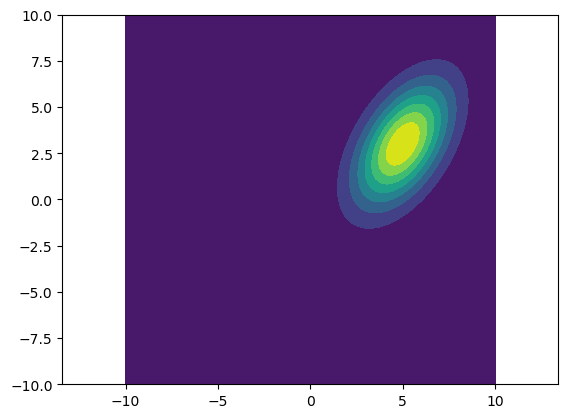

In [91]:
mu = [5, 3]
cov = [[3, 2], 
  	   [2, 5]]

rv = stats.multivariate_normal(mu,cov)

rv

xx = np.linspace(-10, 10, 100)
yy = np.linspace(-10, 10, 100)

XX, YY = np.meshgrid(xx, yy)

plt.contourf(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.show()



이런 공분산 행렬의 고유값을 이용한다면..? 고유벡터에 데이터를 정사영 하여 얻으면 분산이 최대가 되는 것을 알 수 있으나 이에 대한 증명은 생략한다. 

가령 왜 고유값 분해와 특이값 분해에서는 행렬 자체를 분해 했는데 여기서는 공분산 행렬을 분해하는지에 대한 의문을 가질 수 있을 것이다. 

이것은 PCA 방법 자체가 데이터의 '분포(데이터의 퍼진 정도) '에 대한 성분을 분해해서 사용하는 것을 정의로 하기 떄문이다. 꼭 공분산 행렬을 분해하지 않고 ICA나 여러 성분 분석에서 여러 방법을 확인 할 수 있다.

---


3-2) 공분산 행렬을 통한 주성분 분석 
데이터 행렬 X가 주어졌다면 공분산 행렬을 어떻게 구할 것이며 거기에 주성분은 어떻게 추출할까?

$ D = 
\begin{bmatrix}
170 & 70\\
150 & 45\\
160 & 55\\
180 & 60\\
170 & 80\\
\end{bmatrix}
$

이러한 데이터의 공분산은 $\Sigma = {1 \over n} (D-mean(D))^{T}(D-mean(D))$ 으로 나타낼 수 있다.
이를 계산하면 $\Sigma = {1 \over n} X^{T}X = \begin{bmatrix} 108 & 85.2 \\ 85.2 & 108 \end{bmatrix}$

즉 이 공분산 행렬의 고유벡터로 원 데이터를 사영해준다면 PCA작업이 완료가 된다.


In [126]:
import numpy as np
from sklearn.decomposition import PCA

#use sklearn pca
A=np.array([[3, 0], [0, -2]])
pca = PCA()
pca.fit(A)
print("Sklearn PCA output:")
print(pca.transform(A))

#And here is by hand.
Cov=np.matmul((A-A.mean(axis=0)).T, (A-A.mean(axis=0)))/A.shape[0]
#Get the eigenvectors from covariance matrix
V = np.linalg.eig(Cov)[1]
#perform the projection
print("Manual PCA output:")
print(np.matmul(A-A.mean(axis=0), V))

Sklearn PCA output:
[[-1.80277564e+00 -1.11022302e-16]
 [ 1.80277564e+00  1.11022302e-16]]
Manual PCA output:
[[ 1.80277564e+00 -1.11022302e-16]
 [-1.80277564e+00  1.11022302e-16]]


In [134]:
A=np.array([[3, 0], 
			[0, -2]])


In [136]:
A-A.mean(axis=0)

array([[ 1.5,  1. ],
       [-1.5, -1. ]])